In [1]:
# Análisis Comparativo de Métodos de Modelado

#Este notebook replica la metodología de `archivo original`, pero usando los métodos de la carpeta `archivos implementar` y los datos del archivo CSV en `dataset`. Se comparan los métodos en eficiencia, precisión y tiempo de ejecución.


## Flujo de trabajo

#1. **Carga y preprocesamiento de datos**
#2. **Aplicación de métodos de modelado**
#3. **Evaluación y comparación**
#4. **Visualización de resultados**
#5. **Tabla comparativa final**

Valores nulos por columna:
year                 0
month                0
day                  0
hour                 0
minute               0
second               0
recnt_Humidity       0
recnt_Temperature    0
datetime             0
dtype: int64

Resumen estadístico:
       recnt_Humidity  recnt_Temperature
count      341.000000         341.000000
mean        12.932551          21.261290
std          3.377890           0.709617
min          5.000000          19.300000
25%         10.000000          20.900000
50%         13.000000          21.200000
75%         15.000000          21.900000
max         23.000000          22.900000


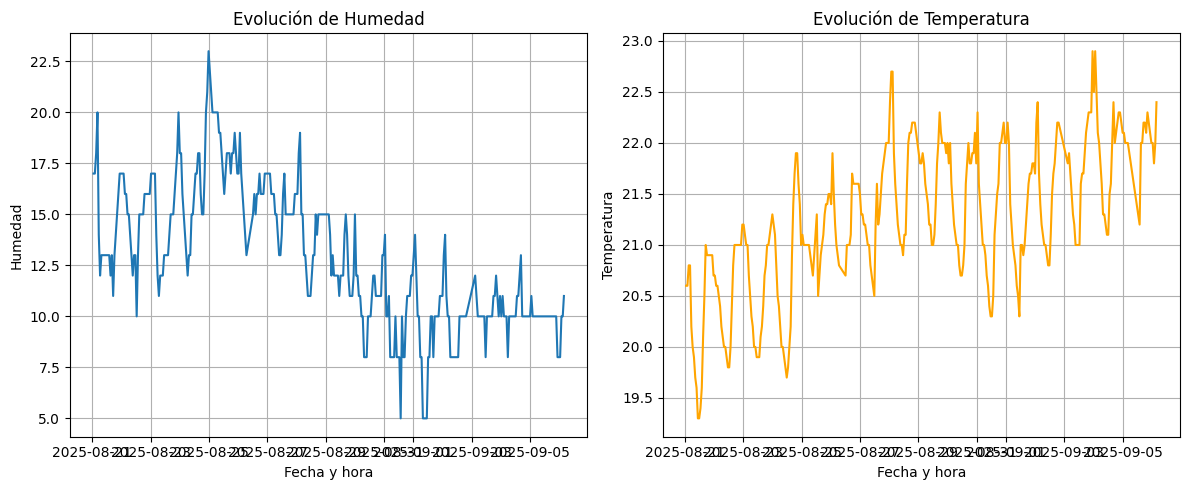

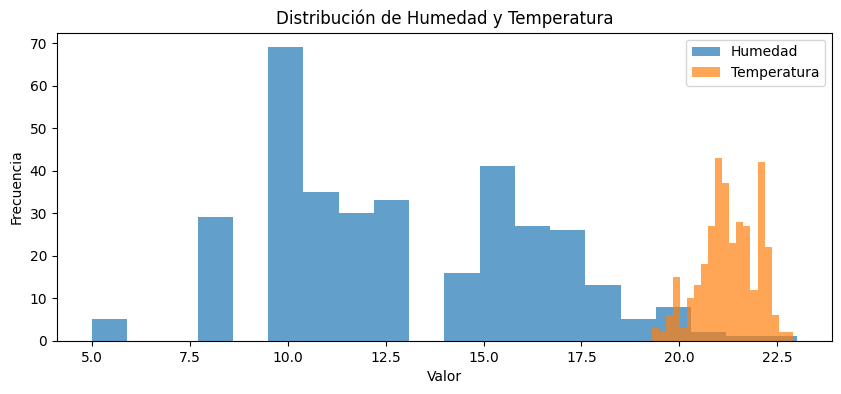

In [2]:
# 1. Carga, limpieza y validación de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Cargar datos
file_path = '../dataset/ML1_temperature.xlsx - Hoja1.csv'
df = pd.read_csv(file_path, delimiter=',')

# Reemplazar comas por puntos en columnas numéricas
for col in ['recnt_Humidity', 'recnt_Temperature']:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Crear columna datetime
cols_fecha = ['year', 'month', 'day', 'hour', 'minute', 'second']
df['datetime'] = pd.to_datetime(df[cols_fecha])

# Validar datos nulos o atípicos
print('Valores nulos por columna:')
print(df.isnull().sum())
print('\nResumen estadístico:')
print(df[['recnt_Humidity', 'recnt_Temperature']].describe())

# Gráficas exploratorias
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(df['datetime'], df['recnt_Humidity'], label='Humedad')
plt.xlabel('Fecha y hora')
plt.ylabel('Humedad')
plt.title('Evolución de Humedad')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(df['datetime'], df['recnt_Temperature'], color='orange', label='Temperatura')
plt.xlabel('Fecha y hora')
plt.ylabel('Temperatura')
plt.title('Evolución de Temperatura')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histograma para ver la distribución
plt.figure(figsize=(10,4))
plt.hist(df['recnt_Humidity'], bins=20, alpha=0.7, label='Humedad')
plt.hist(df['recnt_Temperature'], bins=20, alpha=0.7, label='Temperatura')
plt.title('Distribución de Humedad y Temperatura')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [3]:
# 2. División de datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Tamaño entrenamiento: {X_train.shape}, Tamaño validación: {X_val.shape}")

NameError: name 'X' is not defined

## Regresión Lineal
La regresión lineal es un método sencillo que busca la mejor línea recta que se ajusta a los datos. Es útil como referencia inicial para comparar con modelos más complejos.

MSE: 0.550 | R2: -0.022 | Tiempo: 0.0022 s


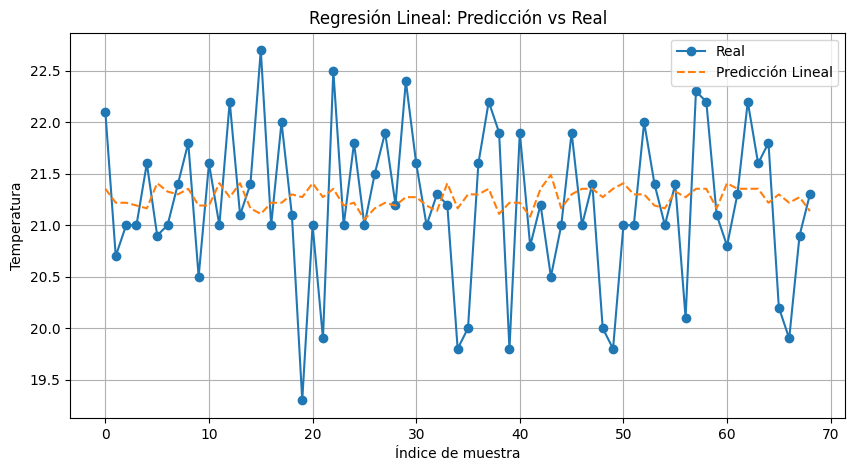

In [ ]:
# 3. Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# Entrenamiento
start = time.time()
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_val)
time_lin = time.time() - start

# Evaluación
mse_lin = mean_squared_error(y_val, y_pred_lin)
r2_lin = r2_score(y_val, y_pred_lin)
print(f"MSE: {mse_lin:.3f} | R2: {r2_lin:.3f} | Tiempo: {time_lin:.4f} s")

# Gráfica de predicción vs real
plt.figure(figsize=(10,5))
plt.plot(y_val.values, label='Real', marker='o')
plt.plot(y_pred_lin, label='Predicción Lineal', linestyle='--')
plt.title('Regresión Lineal: Predicción vs Real')
plt.xlabel('Índice de muestra')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()

## Regresión Polinómica
La regresión polinómica permite ajustar relaciones no lineales entre las variables. Aquí probaremos con un polinomio de grado 2 y 3 para ver si mejora el ajuste.


Polinomio de grado 2
MSE: 0.552 | R2: -0.025 | Tiempo: 0.0057 s


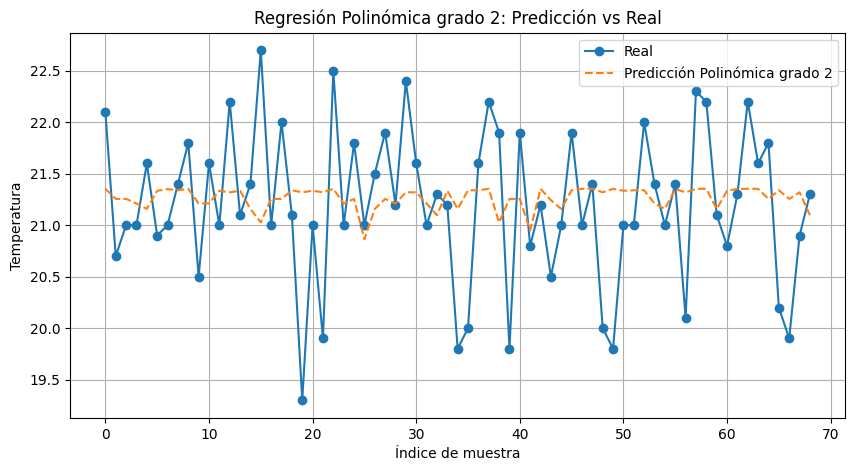


Polinomio de grado 3
MSE: 0.538 | R2: 0.000 | Tiempo: 0.0054 s


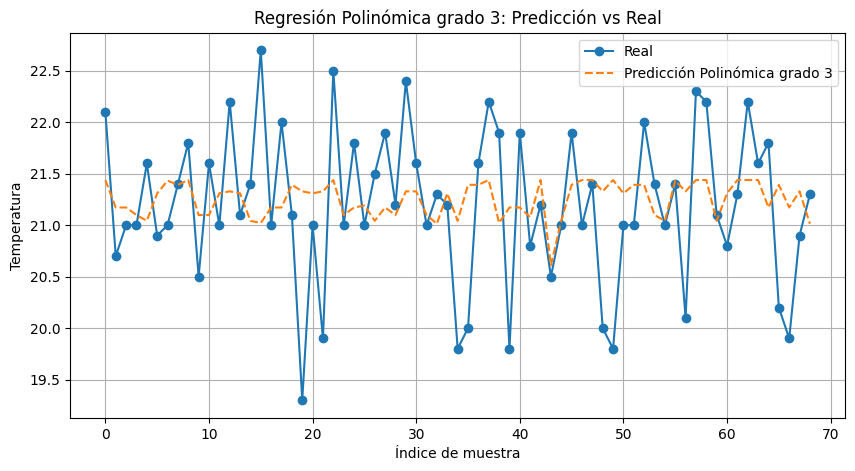

In [ ]:
# 4. Regresión Polinómica (grado 2 y 3)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for grado in [2, 3]:
    print(f"\nPolinomio de grado {grado}")
    start = time.time()
    poly_model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_val)
    time_poly = time.time() - start
    mse_poly = mean_squared_error(y_val, y_pred_poly)
    r2_poly = r2_score(y_val, y_pred_poly)
    print(f"MSE: {mse_poly:.3f} | R2: {r2_poly:.3f} | Tiempo: {time_poly:.4f} s")
    plt.figure(figsize=(10,5))
    plt.plot(y_val.values, label='Real', marker='o')
    plt.plot(y_pred_poly, label=f'Predicción Polinómica grado {grado}', linestyle='--')
    plt.title(f'Regresión Polinómica grado {grado}: Predicción vs Real')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Temperatura')
    plt.legend()
    plt.grid(True)
    plt.show()

## Regularización (Ridge y Lasso)
La regularización ayuda a evitar el sobreajuste penalizando los coeficientes grandes. Ridge usa penalización L2 y Lasso usa penalización L1. Probamos ambos métodos y mostramos sus resultados.


Ridge
MSE: 0.550 | R2: -0.022 | Tiempo: 0.0026 s


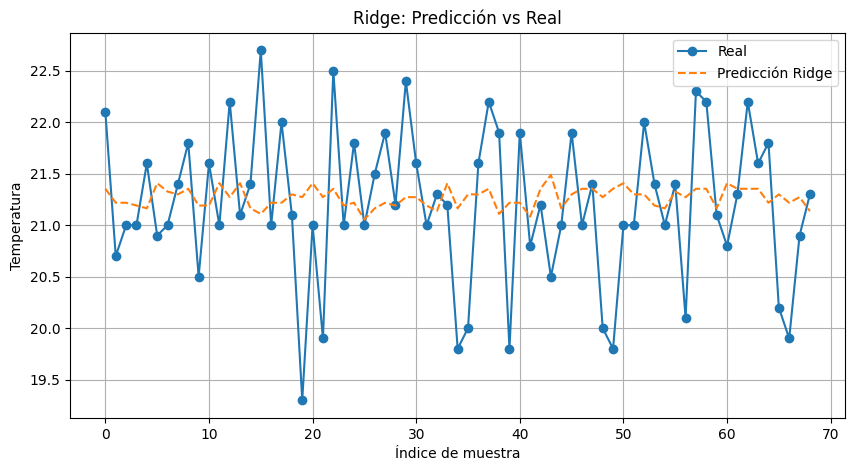


Lasso
MSE: 0.546 | R2: -0.014 | Tiempo: 0.0023 s


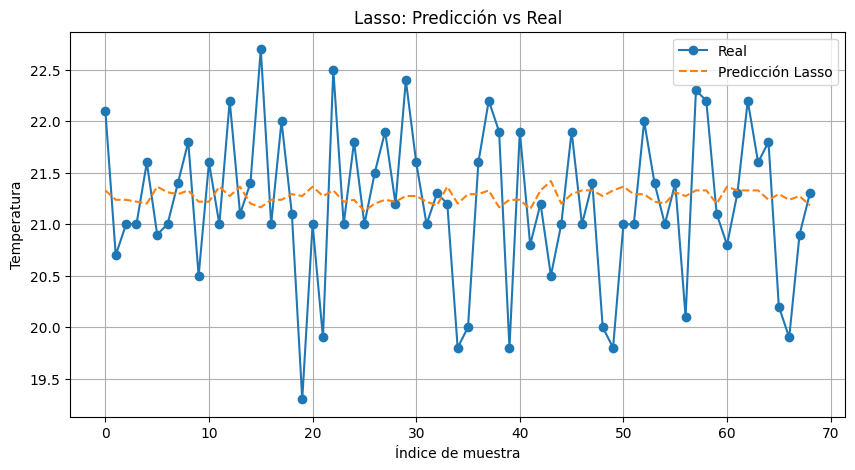

In [ ]:
# 5. Ridge y Lasso
from sklearn.linear_model import Ridge, Lasso

for name, model in [('Ridge', Ridge(alpha=1.0)), ('Lasso', Lasso(alpha=0.1, max_iter=10000))]:
    print(f"\n{name}")
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    time_reg = time.time() - start
    mse_reg = mean_squared_error(y_val, y_pred)
    r2_reg = r2_score(y_val, y_pred)
    print(f"MSE: {mse_reg:.3f} | R2: {r2_reg:.3f} | Tiempo: {time_reg:.4f} s")
    plt.figure(figsize=(10,5))
    plt.plot(y_val.values, label='Real', marker='o')
    plt.plot(y_pred, label=f'Predicción {name}', linestyle='--')
    plt.title(f'{name}: Predicción vs Real')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Temperatura')
    plt.legend()
    plt.grid(True)
    plt.show()

## Resumen comparativo y conclusión
A continuación se muestra una tabla comparativa de todos los métodos probados, junto con una gráfica para comparar eficiencia, precisión y tiempo de ejecución. Así puedes elegir el método más adecuado para tu tarea.

,Método,MSE,R2,Tiempo (s)
0,Lineal,0.549563,-0.021564,0.002231
1,Polinómica grado 2,0.551652,-0.025446,0.002901
2,Polinómica grado 3,0.537941,0.000041,0.002851
3,Ridge,0.549558,-0.021555,0.001479
4,Lasso,0.545571,-0.014144,0.001472


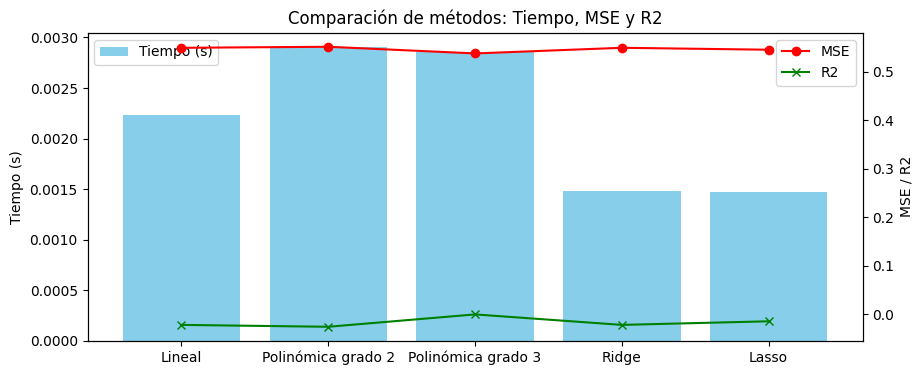

In [ ]:
# 6. Comparación de todos los métodos y tabla resumen

resultados = []

# Regresión Lineal
resultados.append({'Método': 'Lineal', 'MSE': mse_lin, 'R2': r2_lin, 'Tiempo (s)': time_lin})

# Regresión Polinómica grado 2 y 3
for grado in [2, 3]:
    poly_model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
    start = time.time()
    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_val)
    time_poly = time.time() - start
    mse_poly = mean_squared_error(y_val, y_pred_poly)
    r2_poly = r2_score(y_val, y_pred_poly)
    resultados.append({'Método': f'Polinómica grado {grado}', 'MSE': mse_poly, 'R2': r2_poly, 'Tiempo (s)': time_poly})

# Ridge y Lasso
for name, model in [('Ridge', Ridge(alpha=1.0)), ('Lasso', Lasso(alpha=0.1, max_iter=10000))]:
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    time_reg = time.time() - start
    mse_reg = mean_squared_error(y_val, y_pred)
    r2_reg = r2_score(y_val, y_pred)
    resultados.append({'Método': name, 'MSE': mse_reg, 'R2': r2_reg, 'Tiempo (s)': time_reg})

# Mostrar tabla resumen
import pandas as pd

tabla = pd.DataFrame(resultados)
display(tabla)

# Gráfica de comparación de tiempos y precisión
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()
ax1.bar(tabla['Método'], tabla['Tiempo (s)'], color='skyblue', label='Tiempo (s)')
ax2.plot(tabla['Método'], tabla['MSE'], color='red', marker='o', label='MSE')
ax2.plot(tabla['Método'], tabla['R2'], color='green', marker='x', label='R2')
ax1.set_ylabel('Tiempo (s)')
ax2.set_ylabel('MSE / R2')
ax1.set_title('Comparación de métodos: Tiempo, MSE y R2')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

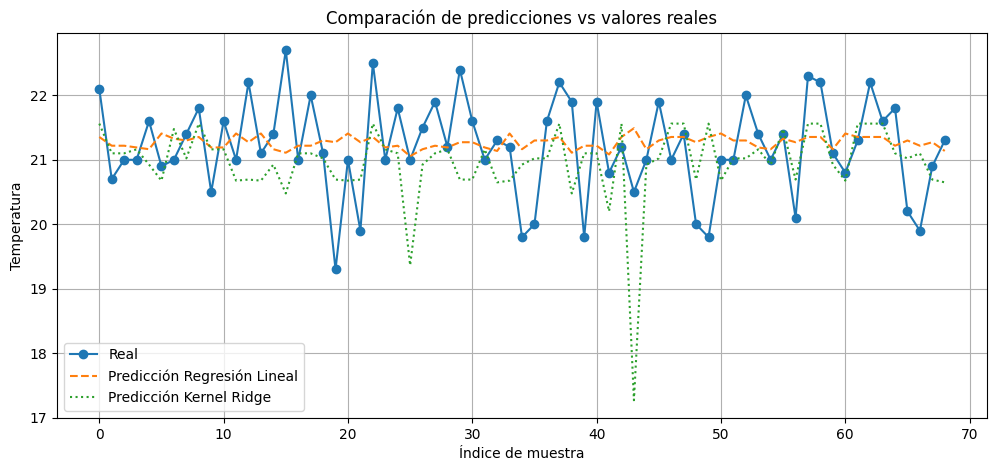

In [ ]:
# 4. Visualización de resultados de validación
plt.figure(figsize=(12,5))
plt.plot(y_val.values, label='Real', marker='o')
plt.plot(y_pred_lin, label='Predicción Regresión Lineal', linestyle='--')
plt.plot(y_pred_kr, label='Predicción Kernel Ridge', linestyle=':')
plt.title('Comparación de predicciones vs valores reales')
plt.xlabel('Índice de muestra')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()

,Método,Tiempo (s),MSE,R2
0,Regresión Lineal,0.001848,0.549563,-0.021564
1,Kernel Ridge (RBF),0.004358,0.751209,-0.396397


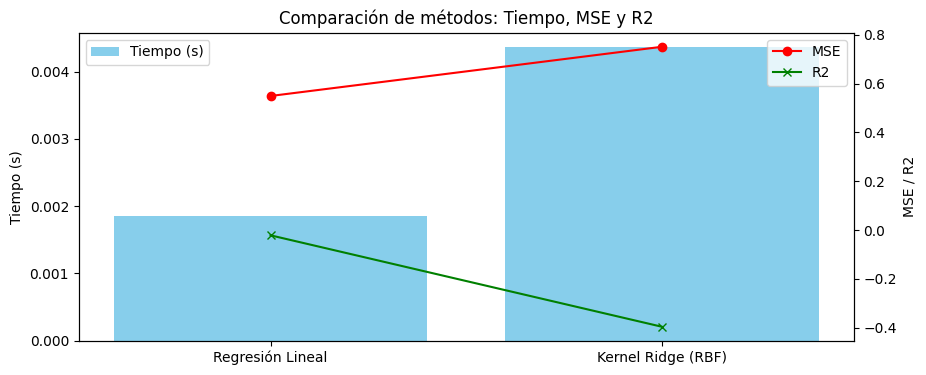

In [ ]:
# 5. Tabla comparativa de resultados
import pandas as pd

tabla = pd.DataFrame(resultados)
display(tabla)

# Gráfica de comparación de tiempos y precisión
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()
ax1.bar(tabla['Método'], tabla['Tiempo (s)'], color='skyblue', label='Tiempo (s)')
ax2.plot(tabla['Método'], tabla['MSE'], color='red', marker='o', label='MSE')
ax2.plot(tabla['Método'], tabla['R2'], color='green', marker='x', label='R2')
ax1.set_ylabel('Tiempo (s)')
ax2.set_ylabel('MSE / R2')
ax1.set_title('Comparación de métodos: Tiempo, MSE y R2')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
# Serie temporal: valores reales vs predichos
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,4))
plt.plot(range(len(y_val)), y_val, label='Real', color='royalblue', linewidth=2)
plt.plot(range(len(y_val_pred)), y_val_pred, label='Predicho', color='darkorange', linewidth=2)
plt.xlabel('Índice (tiempo)')
plt.ylabel('Variable objetivo')
plt.title(f'Serie temporal: Real vs Predicho (R²={r2_score(y_val, y_val_pred):.3f})')
plt.legend()
plt.tight_layout()
plt.show()